In [ ]:
'''
 * Copyright (c) 2017 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

$$
\text{Algorithm  Least Angle Regression}
$$

1. **Standardize the predictors** to have mean zero and unit norm. Start with the residual 
$$ r = y - \bar{y}, \, \beta_1 = \beta_2 = \dots = \beta_p = 0 $$.

2. **Find the predictor** $ x_j $ most correlated with $ r $.

3. **Move** $ \beta_j $ from 0 towards its least-squares coefficient 
$$ \langle x_j, r \rangle $$ 
until some other competitor $ x_k $ has as much correlation with the current residual as $ x_j $.

4. **Move** $ \beta_j $ and $ \beta_k $ in the direction defined by their joint least-squares coefficient of the current residual on $ (x_j, x_k) $, until some other competitor $ x_l $ has as much correlation with the current residual.

5. **Continue** in this way until all $ p $ predictors have been entered. After $ \min(N-1, p) $ steps, we arrive at the full least-squares solution.

Let $ A_k $ be the active set of variables at the beginning of the $ k $-th step, and let $ \beta_{A_k} $ be the coefficient vector for these variables at this step. There will be \( k-1 \) nonzero values, and the one just entered will be zero. If 
$$ r_k = y - X_{A_k} \beta_{A_k} $$ 
is the current residual, then the direction for this step is given by:

$$ 
\delta_k = (X_{A_k}^T X_{A_k})^{-1} X_{A_k}^T r_k 
\quad (3.55).
$$

The coefficient profile evolves as:

$$ 
\beta_{A_k}(\alpha) = \beta_{A_k} + \alpha \cdot \delta_k.
$$

If the fit vector at the beginning of this step is \( \hat{f}_k \), then it evolves as:

$$ 
\hat{f}_k(\alpha) = \hat{f}_k + \alpha \cdot u_k, 
$$
where 
$$ u_k = X_{A_k} \delta_k 
$$ 
is the new fit direction.


$$
\text{Algorithm : Least Angle Regression (LAR)}
$$

1. Standardize the predictors to have mean zero and unit norm. Start with the residual:
$$
r = y - \bar{y}, \quad \beta_1, \beta_2, \dots, \beta_p = 0
$$

2. Find the predictor $x_j$ most correlated with $r$.

3. Move $\beta_j$ from 0 towards its least-squares coefficient:
$$
\langle x_j, r \rangle
$$
until some other competitor $x_k$ has as much correlation with the current residual as does $x_j$.

4. Move $\beta_j$ and $\beta_k$ in the direction defined by their joint least-squares coefficient of the current residual on $(x_j, x_k)$, until another competitor $x_l$ has as much correlation with the current residual.

5. Continue in this way until all $p$ predictors have been entered. After $\min(N - 1, p)$ steps, we arrive at the full least-squares solution.

---

$$
\text{Suppose } A_k \text{ is the active set of variables at the beginning of the kth step, and let } \beta_{A_k} \text{ be the coefficient vector for these variables at this step.}
$$

There will be $k - 1$ nonzero values, and the one just entered will be zero. If:
$$
r_k = y - X_{A_k} \beta_{A_k}
$$
is the current residual, then the direction for this step is:
$$
\delta_k = (X_{A_k}^T X_{A_k})^{-1} X_{A_k}^T r_k \quad \text{(3.55)}
$$

The coefficient profile then evolves as:
$$
\beta_{A_k}(\alpha) = \beta_{A_k} + \alpha \cdot \delta_k
$$

If the fit vector at the beginning of this step is \(\hat{f}_k\), then it evolves as:
$$
\hat{f}_k(\alpha) = \hat{f}_k + \alpha \cdot u_k, \quad \text{where} \quad u_k = X_{A_k} \delta_k
$$

The name “least angle” arises from a geometrical interpretation of this process:
$$
u_k \text{ makes the smallest (and equal) angle with each of the predictors in } A_k
$$

---

$$
\text{By construction, the coefficients in LAR change in a piecewise linear fashion. Figure 1 [left panel] shows the LAR coefficient profile evolving as a function of their } L_1 \text{ arc length.}
$$
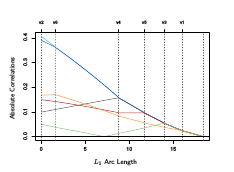
FIGURE 3. Progression of the absolute correlations during each step of the LAR procedure, using a simulated data set with six predictors. The labels at the top of the plot indicate which variables enter the active set at each step. The step length are measured in units of L1 arc length.

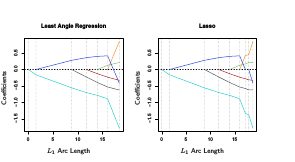

FIGURE 4. Left panel shows the LAR coeﬃcient proﬁles on the simulated data, as a function of the L1 arc length. The right panel shows the Lasso proﬁle. They are identical until the dark-blue coeﬃcient crosses zero at an arc length of about 18.

# LAR (Lasso) Algorithm Documentation

The Least Angle Regression (LAR) algorithm is known for its efficiency, requiring computational time comparable to that of a single least squares fit with \( p \) predictors. The key characteristics of LAR and its modification for Lasso can be summarized as follows:

## Key Points

- **Efficiency**: The LAR algorithm performs similarly to the least squares estimate, requiring $O(p) $computations.
- **Path Characteristics**:
  - LAR takes $ p $ steps to reach the full least squares estimates.
  - The Lasso path can take more than $ p $ steps, though both paths are often similar.
  
- **Computational Methods**:
  - The Lasso problem can be efficiently solved using the modified algorithm described in Algorithm  with modification, particularly advantageous when $p \gg N$ 
  - Osborne et al. (2000a) introduced a homotopy algorithm that computes a piecewise-linear path for the Lasso.

## Heuristic Argument

Both algorithms can be understood through their mathematical formulations. Although the LAR algorithm is initially expressed in terms of correlations, it can be simplified using inner products when input features are standardized.

Let $ A $denote the active set of variables at a specific stage of the algorithm, tied in their absolute inner-product with the current residuals $ y - X\beta $. This relationship can be expressed as:

$$
x_j^T (y - X\beta) = \gamma \cdot s_j, \quad \forall j \in A
$$

where $ s_j \in \{-1, 1\} $ indicates the sign of the inner product, and $ \gamma $ is the common value. Additionally, we have:

$$
|x_k^T (y - X\beta)| \leq \gamma \quad \forall k \notin A
$$

Now, considering the Lasso criterion, we write it in vector form as:

$$
R(\beta) = \frac{1}{2} ||y - X\beta||_2^2 + \lambda ||\beta||_1
$$

Let \( B \) be the active set of variables in the solution for a given value of $ \lambda $. For these variables, $ R(\beta) $ is differentiable, leading to the stationarity conditions:

$$
x_j^T (y - X\beta) = \lambda \cdot \text{sign}(\beta_j), \quad \forall j \in B
$$

### Comparison of Conditions

By comparing the equations:

- Equation from LAR:
  $$
  x_j^T (y - X\beta) = \gamma \cdot s_j
  $$

- Equation from Lasso:
  $$
  x_j^T (y - X\beta) = \lambda \cdot \text{sign}(\beta_j)
  $$

We find that they are identical only if the sign of $ \beta_j $ matches the sign of the inner product. This illustrates the close relationship between the LAR and Lasso algorithms.
## Differences Between LAR and Lasso

The LAR and Lasso algorithms begin to diverge when an active coefficient crosses zero. At this point, condition is violated for that variable, resulting in its removal from the active set \( B \). This behavior is crucial in understanding the piecewise-linear coefficient profile that arises as $ \lambda $ decreases, as illustrated in below.

### Stationarity Conditions

For the non-active variables, the stationarity conditions require that:

$$
|x_k^T (y - X\beta)| \leq \lambda, \quad \forall k \notin B
$$

This condition aligns with the principles of the LAR algorithm, indicating that the relationship between the coefficients and the residuals maintains a boundary defined by $ \lambda $.

### Comparison of Algorithms

Figure 3 provides a comparative analysis of LAR and Lasso against forward stepwise and stagewise regression. The experimental setup mirrors that of Figure 3, but with $ N = 100 $ rather than $ 300 $, increasing the difficulty of the problem.

**Key Observations:**

- The forward stepwise regression exhibits aggressive behavior, leading to early overfitting. It begins to perform poorly before all 10 true variables have been included in the model.
- In contrast, the slower forward stagewise regression performs better by avoiding premature overfitting.
- The behavior of LAR and Lasso aligns more closely with that of forward stagewise regression, indicating a more conservative approach to model fitting.

Incremental forward stagewise regression shares similarities with LAR and Lasso and is further detailed in next Section.



In [ ]:
import random

# Lasso LAR Implementation
class LassoLAR:
    def fit(self, X, y, lambda_value):
        n_samples, n_features = len(X), len(X[0])
        self.beta = [0] * n_features  # Coefficients
        residuals = y.copy()
        active_set = []

        while True:
            correlations = [sum(X[i][j] * residuals[i] for i in range(n_samples)) for j in range(n_features)]
            j = max(range(n_features), key=lambda x: abs(correlations[x]))
            active_set.append(j)

            # Update coefficients based on Lasso criteria
            for j in active_set:
                if correlations[j] > lambda_value:
                    self.beta[j] = correlations[j] - lambda_value
                elif correlations[j] < -lambda_value:
                    self.beta[j] = correlations[j] + lambda_value
                else:
                    self.beta[j] = 0
            
            # Update residuals
            residuals = [y[i] - sum(X[i][k] * self.beta[k] for k in range(n_features)) for i in range(n_samples)]
            # Break if no more updates (convergence check)
            if all(abs(r) < 1e-6 for r in residuals):
                break

        return self.beta

# Generate synthetic data
def generate_data(n_samples, n_features, noise=0.1):
    X = [[random.uniform(0, 1) for _ in range(n_features)] for _ in range(n_samples)]
    coef = [random.uniform(-1, 1) for _ in range(n_features)]
    y = [sum(X[i][j] * coef[j] for j in range(n_features)) + random.uniform(-noise, noise) for i in range(n_samples)]
    return X, y, coef

# Comparing with a simple linear regression
def simple_linear_regression(X, y):
    n_samples, n_features = len(X), len(X[0])
    beta = [0] * n_features
    for j in range(n_features):
        X_j = [X[i][j] for i in range(n_samples)]
        y_j = [y[i] for i in range(n_samples)]
        beta[j] = sum(X_j[i] * y_j[i] for i in range(n_samples)) / sum(x**2 for x in X_j)
    return beta

# Main execution
if __name__ == "__main__":
    n_samples = 100
    n_features = 20
    X, y, true_coef = generate_data(n_samples, n_features)

    # Fit the Lasso LAR model
    lambda_value = 0.1
    lasso_lar = LassoLAR()
    lasso_lar.fit(X, y, lambda_value)

    # Fit simple linear regression
    linear_reg_coef = simple_linear_regression(X, y)

    # Display results
    print("True Coefficients: ", true_coef)
    print("Lasso LAR Coefficients: ", lasso_lar.beta)
    print("Linear Regression Coefficients: ", linear_reg_coef)

main()

In [ ]:
n_samples = 100
n_features = 20
X, y, true_coef = generate_data(n_samples, n_features)

    # Fit the Lasso LAR model
lambda_value = 0.1
lasso_lar = LassoLAR()
lasso_lar.fit(X, y, lambda_value)

    # Fit simple linear regression
linear_reg_coef = simple_linear_regression(X, y)

    # Display results
print("True Coefficients: ", true_coef)
print("Lasso LAR Coefficients: ", lasso_lar.beta)
print("Linear Regression Coefficients: ", linear_reg_coef)


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Lasso LAR Implementation
class LassoLAR:
    def fit(self, X, y, lambda_value):
        n_samples, n_features = len(X), len(X[0])
        self.beta = [0] * n_features  # Coefficients
        residuals = y.copy()
        active_set = []

        while True:
            correlations = [sum(X[i][j] * residuals[i] for i in range(n_samples)) for j in range(n_features)]
            j = max(range(n_features), key=lambda x: abs(correlations[x]))
            active_set.append(j)

            # Update coefficients based on Lasso criteria
            for j in active_set:
                if correlations[j] > lambda_value:
                    self.beta[j] = correlations[j] - lambda_value
                elif correlations[j] < -lambda_value:
                    self.beta[j] = correlations[j] + lambda_value
                else:
                    self.beta[j] = 0
            
            # Update residuals
            residuals = [y[i] - sum(X[i][k] * self.beta[k] for k in range(n_features)) for i in range(n_samples)]
            # Break if no more updates (convergence check)
            if all(abs(r) < 1e-6 for r in residuals):
                break

        return self.beta

# Generate synthetic data
def generate_data(n_samples, n_features, noise=0.1):
    X = [[random.uniform(0, 1) for _ in range(n_features)] for _ in range(n_samples)]
    coef = [random.uniform(-1, 1) for _ in range(n_features)]
    y = [sum(X[i][j] * coef[j] for j in range(n_features)) + random.uniform(-noise, noise) for i in range(n_samples)]
    return X, y, coef

# Comparing with a simple linear regression
def simple_linear_regression(X, y):
    n_samples, n_features = len(X), len(X[0])
    beta = [0] * n_features
    for j in range(n_features):
        X_j = [X[i][j] for i in range(n_samples)]
        y_j = [y[i] for i in range(n_samples)]
        beta[j] = sum(X_j[i] * y_j[i] for i in range(n_samples)) / sum(x**2 for x in X_j)
    return beta

# Simple SGD regression (L1)
def sgd_lasso(X, y, lambda_value, max_iter=1000):
    n_samples, n_features = len(X), len(X[0])
    beta = np.zeros(n_features)
    for _ in range(max_iter):
        for i in range(n_samples):
            for j in range(n_features):
                if X[i][j] != 0:
                    update = (y[i] - np.dot(X[i], beta)) * X[i][j] - lambda_value * np.sign(beta[j])
                    beta[j] += update
    return beta

# Plotting the results
def plot_coefficients(true_coef, lasso_lar_coef, linear_reg_coef, sgd_coef):
    plt.figure(figsize=(12, 8))
    
    # Indices for plotting
    indices = np.arange(len(true_coef))
    
    plt.plot(indices, true_coef, marker='o', label='True Coefficients', color='blue')
    plt.plot(indices, lasso_lar_coef, marker='x', label='Lasso LAR Coefficients', color='red')
    plt.plot(indices, linear_reg_coef, marker='s', label='Linear Regression Coefficients', color='green')
    plt.plot(indices, sgd_coef, marker='d', label='SGD Lasso Coefficients', color='orange')

    plt.title('Coefficient Comparison of Different Algorithms')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')
    plt.axhline(0, color='grey', lw=1, ls='--')
    plt.legend()
    plt.grid()
    plt.show()

# Main execution
if __name__ == "__main__":
    n_samples = 100
    n_features = 20
    X, y, true_coef = generate_data(n_samples, n_features)

    # Fit the Lasso LAR model
    lambda_value = 0.1
    lasso_lar = LassoLAR()
    lasso_lar.fit(X, y, lambda_value)

    # Fit simple linear regression
    linear_reg_coef = simple_linear_regression(X, y)

    # Fit SGD Lasso
    sgd_coef = sgd_lasso(X, y, lambda_value)

    # Plot results
    plot_coefficients(true_coef, lasso_lar.beta, linear_reg_coef, sgd_coef)


# Degrees of Freedom for LAR and Lasso

## Basic Definition
When fitting a linear model using a subset of \( k \) features, if this subset is predetermined (not influenced by the training data), the degrees of freedom (df) used in the model is simply \( k \). 

For models where the selection of features is based on the data (adaptive fitting), we need a more nuanced definition of effective degrees of freedom.

## Effective Degrees of Freedom
The effective degrees of freedom can be defined using the covariance between the predicted values \( \hat{y} \) and the actual outcome values \( y \). The formula is given as:

$$
df(\hat{y}) = \frac{1}{N} \sum_{i=1}^{N} \text{Cov}(\hat{y}_i, y_i)
$$

Where:
- $ N $ is the number of observations.
- $ \text{Cov}(\hat{y}_i, y_i) $ represents the covariance between the predicted values $ \hat{y}_i $ and the actual values $ y_i $.

## Intuition Behind the Formula
The more closely the model fits the data, the greater the covariance between the predicted and actual values. Thus, higher fitting leads to a larger effective degrees of freedom. 

This approach accommodates models that adaptively fit to the data, acknowledging that the process of feature selection (e.g., best subset selection) may consume more degrees of freedom than just the number of parameters included.

## Application
The concept of effective degrees of freedom is critical in understanding model complexity and avoiding overfitting, especially in high-dimensional settings. It allows for comparison between different modeling approaches, helping to quantify how much flexibility a model has based on its fitting process.

## Example Calculation
To apply this formula, you would typically:
1. Fit your model to the data.
2. Obtain predicted values $ \hat{y} $.
3. Calculate the covariance between $ \hat{y} $ and $ y $.
4. Use the effective degrees of freedom formula to determine how complex your model is in terms of fitting the data.

This understanding helps in tuning the model parameters and selecting an appropriate penalty term for Lasso, ultimately leading to better model selection and evaluation strategies.

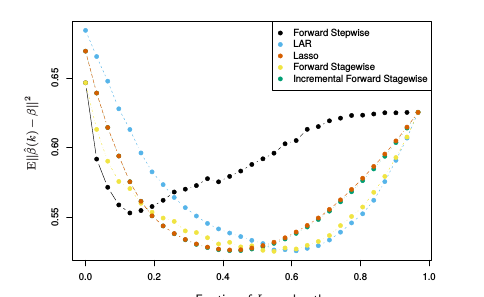

FIGURE 4. Comparison of LAR and lasso with forward stepwise, forward stagewise (FS) and incremental forward stagewise (FS0 ) regression. The setup is the same as in Figure 3.6, except N = 100 here rather than 300. Here the slower FS regression ultimately outperforms forward stepwise. LAR and lasso show similar behavior to FS and FS0 . Since the procedures take diﬀerent numbers of steps (across simulation replicates and methods), we plot the MSE as a function of the fraction of total L1 arc-length toward the least-squares ﬁt.


## Adaptive Fitting and Degrees of Freedom

When fitting a linear regression model with \( k \) fixed predictors, it is straightforward to show that:

$$
df(\hat{y}) = k
$$

For ridge regression, this definition leads to the closed-form expression:

$$
df(\hat{y}) = \text{tr}(S_\lambda)
$$

In these cases, the degrees of freedom defined in equation (3.60) is easy to evaluate because the fit \( \hat{y} = H_\lambda y \) is linear in \( y \).

### Best Subset Selection
If we consider the context of a best subset selection of size \( k \), it is evident that:

$$
df(\hat{y}) > k
$$

This can be verified by estimating $ \text{Cov}(\hat{y}_i, y_i) / \sigma^2 $ directly through simulation. However, there is no closed-form method for estimating $ df(\hat{y}) $ for best subset selection.

### LAR and Lasso
For LAR and Lasso, something remarkable occurs. These techniques adaptively fit to the training data in a smoother manner than best subset selection, making the estimation of degrees of freedom more tractable.

Specifically, it can be shown that after the \( k \)th step of the LAR procedure, the effective degrees of freedom of the fitted vector is exactly:

$$
df(\hat{y}) = k
$$

For Lasso, the (modified) LAR procedure also results in a similarly manageable estimation of degrees of freedom, which can be computed after each step.
## Adaptive Fitting and Degrees of Freedom

When fitting a linear regression model with \( k \) fixed predictors, it is straightforward to show that:

$$
df(\hat{y}) = k
$$

For ridge regression, this definition leads to the closed-form expression:

$$
df(\hat{y}) = \text{tr}(S_\lambda)
$$

In these cases, the degrees of freedom defined in equation (3.60) is easy to evaluate because the fit \( \hat{y} = H_\lambda y \) is linear in \( y \).

### Best Subset Selection
If we consider the context of a best subset selection of size \( k \), it is evident that:

$$
df(\hat{y}) > k
$$

This can be verified by estimating \( \text{Cov}(\hat{y}_i, y_i) / \sigma^2 \) directly through simulation. However, there is no closed-form method for estimating \( df(\hat{y}) \) for best subset selection.

### LAR and Lasso
For LAR and Lasso, something remarkable occurs. These techniques adaptively fit to the training data in a smoother manner than best subset selection, making the estimation of degrees of freedom more tractable.

Specifically, it can be shown that after the \( k \)th step of the LAR procedure, the effective degrees of freedom of the fitted vector is exactly:

$$
df(\hat{y}) = k
$$

For Lasso, the (modified) LAR procedure also results in a similarly manageable estimation of degrees of freedom, which can be computed after each step.
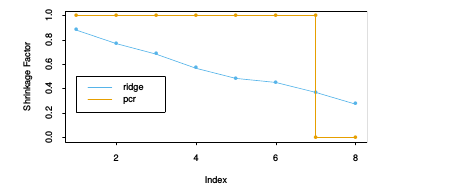
FIGURE 7. Ridge regression shrinks the regression coeﬃcients of the prin- cipal components, using shrinkage factors $d2j /(d2j + λ)$. Principal component regression truncates them. Shown are the shrinkage and truncation patterns corresponding to Figure 3.7, as a function of the principal component index.

In [ ]:
import random

# Lasso LAR Implementation
class LassoLAR:
    def fit(self, X, y, lambda_value):
        n_samples, n_features = len(X), len(X[0])
        self.beta = [0] * n_features  # Coefficients
        residuals = y.copy()
        active_set = []

        while True:
            correlations = [sum(X[i][j] * residuals[i] for i in range(n_samples)) for j in range(n_features)]
            j = max(range(n_features), key=lambda x: abs(correlations[x]))
            active_set.append(j)

            # Update coefficients based on Lasso criteria
            for j in active_set:
                if correlations[j] > lambda_value:
                    self.beta[j] = correlations[j] - lambda_value
                elif correlations[j] < -lambda_value:
                    self.beta[j] = correlations[j] + lambda_value
                else:
                    self.beta[j] = 0
            
            # Update residuals
            residuals = [y[i] - sum(X[i][k] * self.beta[k] for k in range(n_features)) for i in range(n_samples)]
            # Break if no more updates (convergence check)
            if all(abs(r) < 1e-6 for r in residuals):
                break

        return self.beta

# Generate synthetic data
def generate_data(n_samples, n_features, noise=0.1):
    X = [[random.uniform(0, 1) for _ in range(n_features)] for _ in range(n_samples)]
    coef = [random.uniform(-1, 1) for _ in range(n_features)]
    y = [sum(X[i][j] * coef[j] for j in range(n_features)) + random.uniform(-noise, noise) for i in range(n_samples)]
    return X, y, coef

# Simple linear regression
def simple_linear_regression(X, y):
    n_samples, n_features = len(X), len(X[0])
    beta = [0] * n_features
    for j in range(n_features):
        X_j = [X[i][j] for i in range(n_samples)]
        y_j = [y[i] for i in range(n_samples)]
        beta[j] = sum(X_j[i] * y_j[i] for i in range(n_samples)) / sum(x**2 for x in X_j)
    return beta

# Simple SGD regression (L1)
def sgd_lasso(X, y, lambda_value, max_iter=1000):
    n_samples, n_features = len(X), len(X[0])
    beta = [0] * n_features
    for _ in range(max_iter):
        for i in range(n_samples):
            for j in range(n_features):
                if X[i][j] != 0:
                    update = (y[i] - sum(X[i][k] * beta[k] for k in range(n_features))) * X[i][j] - lambda_value * (1 if beta[j] > 0 else -1)
                    beta[j] += update
    return beta

# ASCII Art Plotting Function
def plot_coefficients(true_coef, lasso_coef, lin_reg_coef, sgd_coef):
    n_features = len(true_coef)
    max_coef = max(max(true_coef), max(lasso_coef), max(lin_reg_coef), max(sgd_coef)) + 1
    min_coef = min(min(true_coef), min(lasso_coef), min(lin_reg_coef), min(sgd_coef)) - 1
    scale = 10  # Scaling factor for plotting

    print("\nCoefficients Comparison:")
    for i in range(n_features):
        true_value = int((true_coef[i] - min_coef) * scale)
        lasso_value = int((lasso_coef[i] - min_coef) * scale)
        lin_reg_value = int((lin_reg_coef[i] - min_coef) * scale)
        sgd_value = int((sgd_coef[i] - min_coef) * scale)

        print(f"Feature {i+1:2}: True: {'*' * true_value}, Lasso: {'*' * lasso_value}, Linear: {'*' * lin_reg_value}, SGD: {'*' * sgd_value}")

# Main execution
if __name__ == "__main__":
    n_samples = 100
    n_features = 20
    X, y, true_coef = generate_data(n_samples, n_features)

    # Fit the Lasso LAR model
    lambda_value = 0.1
    lasso_lar = LassoLAR()
    lasso_coef = lasso_lar.fit(X, y, lambda_value)

    # Fit simple linear regression
    lin_reg_coef = simple_linear_regression(X, y)

    # Fit SGD Lasso
    sgd_coef = sgd_lasso(X, y, lambda_value)

    # Plot results
    plot_coefficients(true_coef, lasso_coef, lin_reg_coef, sgd_coef)
main()

In [ ]:
n_samples = 100
n_features = 20
X, y, true_coef = generate_data(n_samples, n_features)

    # Fit the Lasso LAR model
lambda_value = 0.1
lasso_lar = LassoLAR()
lasso_coef = lasso_lar.fit(X, y, lambda_value)

    # Fit simple linear regression
lin_reg_coef = simple_linear_regression(X, y)

    # Fit SGD Lasso
sgd_coef = sgd_lasso(X, y, lambda_value)

    # Plot results
plot_coefficients(true_coef, lasso_coef, lin_reg_coef, sgd_coef)


## Partial Least Squares

Partial Least Squares (PLS) constructs a set of linear combinations of the inputs for regression, utilizing both $ \mathbf{X} $ and $ \mathbf{y} $ for this construction. Like Principal Components Regression, PLS is not scale invariant, so we assume that each $ x_j $ is standardized to have mean 0 and variance 1.

### PLS Construction Process
PLS begins by computing

$$
\hat{\phi}_{1j} = \langle x_j, y \rangle \quad \text{for each } j.
$$

From this, we construct the derived input

$$
z_1 = \sum_{j} \hat{\phi}_{1j} x_j,
$$

which is the first partial least squares direction. In constructing each \( z_m \), the inputs are weighted by the strength of their univariate effect on \( y \).

The outcome $ y $ is then regressed on $ z_1 $ to obtain the coefficient $ \hat{\theta}_1 $, and subsequently, we orthogonalize $ x_1, \ldots, x_p $ with respect to $ z_1 $. This process continues until $ M \leq p $ directions have been obtained, resulting in a sequence of derived, orthogonal inputs or directions $ z_1, z_2, \ldots, z_M $.

As with Principal Components Regression, if all $ M = p $ directions are constructed, the solution is equivalent to the usual least squares estimates. Using $ M < p $ directions yields a reduced regression.

### PLS Algorithm
Algorithm : Partial Least Squares
1. Standardize each $ x_j $ to have mean zero and variance one. Set $ \hat{y}(0) = 0 $ and $ x_j = x_j $ for $ j = 1, \ldots, p $.
2. For $ m = 1, 2, \ldots, p $:
   - (a) Compute 

   $$
   z_m = \sum_{j=1}^{p} \hat{\phi}_{mj} x_j, \quad \text{where } \hat{\phi}_{mj} = \langle x_j, y \rangle.
   $$

   - (b) Obtain 

   $$
   \hat{\theta}_m = \frac{\langle z_m, y \rangle}{\langle z_m, z_m \rangle}.
   $$

   - (c) Update 

   $$
   \hat{y}(m) = \hat{y}(m-1) + \hat{\theta}_m z_m.
   $$

   - (d) Orthogonalize each $ x_j $ with respect to $z_m $:

   $$
   x_j = x_j - \frac{\langle z_{m-1}, x_j \rangle}{\langle z_{m-1}, z_{m-1} \rangle} z_m, \quad j = 1, 2, \ldots, p.
   $$

3. Output the sequence of fitted vectors $ \{\hat{y}(m)\}_{m=1}^{p} $.

### Optimization Problem
Partial Least Squares seeks directions that have high variance and high correlation with the response \( y \), in contrast to Principal Components Regression, which focuses solely on high variance. 

The $ m $-th Principal Component direction $ v_m $ solves:

$$
\max_{\alpha} \text{Var}(X\alpha) \quad \text{subject to } ||\alpha|| = 1, \quad \alpha^T S v_\ell = 0, \quad \ell = 1, \ldots, m-1,
$$

where $ S $ is the sample covariance matrix of the $ x_j $.

The $ m $-th PLS direction $ \hat{\phi}_m $ solves:

$$
\max_{\alpha} \text{Corr}^2(y, X\alpha) \cdot \text{Var}(X\alpha) \quad \text{subject to } ||\alpha|| = 1, \quad \alpha^T S \hat{\phi}_\ell = 0, \quad \ell = 1, \ldots, m-1.
$$

Further analysis reveals that the variance aspect tends to dominate, causing PLS to behave similarly to ridge regression and principal components regression.

### Special Cases
If the input matrix $ X $ is orthogonal, PLS finds the least squares estimates after $ m = 1 $ steps. Subsequent steps have no effect since $ \hat{\phi}_{mj} = 0 $ for $ m > 1 $. Additionally, the sequence of PLS coefficients for $ m = 1, 2, \ldots, p $ represents the conjugate gradient sequence for computing the least squares solutions.


In [3]:
import random

# Partial Least Squares Implementation
class PartialLeastSquares:
    def fit(self, X, y, max_components):
        n_samples, n_features = len(X), len(X[0])
        self.beta = [0] * n_features  # Coefficients
        y_hat = [0] * n_samples  # Fitted values

        for m in range(max_components):
            # Calculate phi_m for each feature
            phi_m = [sum(X[i][j] * y[i] for i in range(n_samples)) for j in range(n_features)]
            # Find the feature with the maximum correlation
            max_index = phi_m.index(max(phi_m))

            # Construct the z_m direction
            z_m = [X[i][max_index] for i in range(n_samples)]

            # Calculate the coefficient
            theta_m = sum(z_m[i] * y[i] for i in range(n_samples)) / sum(z_m[i] ** 2 for i in range(n_samples))
            self.beta[max_index] += theta_m

            # Update y_hat
            y_hat = [y_hat[i] + theta_m * z_m[i] for i in range(n_samples)]

            # Orthogonalize X
            for j in range(n_features):
                if j != max_index:
                    projection = sum(z_m[i] * X[i][j] for i in range(n_samples)) / sum(z_m[i] ** 2 for i in range(n_samples))
                    for i in range(n_samples):
                        X[i][j] -= projection * z_m[i]

        return y_hat

# Generate synthetic data
def generate_data(n_samples, n_features, noise=0.1):
    X = [[random.uniform(0, 1) for _ in range(n_features)] for _ in range(n_samples)]
    coef = [random.uniform(-1, 1) for _ in range(n_features)]
    y = [sum(X[i][j] * coef[j] for j in range(n_features)) + random.uniform(-noise, noise) for i in range(n_samples)]
    return X, y, coef

# ASCII Art Plotting Function
def plot_coefficients(true_coef, pls_coef):
    n_features = len(true_coef)
    max_coef = max(max(true_coef), max(pls_coef)) + 1
    scale = 10  # Scaling factor for plotting

    print("\nCoefficients Comparison:")
    for i in range(n_features):
        true_value = int((true_coef[i] - min(true_coef)) * scale)
        pls_value = int((pls_coef[i] - min(true_coef)) * scale)

        print(f"Feature {i+1:2}: True: {'*' * true_value}, PLS: {'*' * pls_value}")

# Initialize parameters
n_samples = 100
n_features = 20
max_components = 2  # Number of PLS directions to compute

# Generate data
X, y, true_coef = generate_data(n_samples, n_features)

# Fit the PLS model
pls_model = PartialLeastSquares()
pls_coef = pls_model.fit(X, y, max_components)

# Plot results
plot_coefficients(true_coef, pls_coef)



Coefficients Comparison:
Feature  1: True: **, PLS: *********
Feature  2: True: ****, PLS: **********
Feature  3: True: ******************, PLS: *********
Feature  4: True: ***, PLS: *********
Feature  5: True: *******, PLS: *********
Feature  6: True: *******************, PLS: *********
Feature  7: True: ****************, PLS: *********
Feature  8: True: *, PLS: ********
Feature  9: True: , PLS: ********
Feature 10: True: ******, PLS: *********
Feature 11: True: *********, PLS: ********
Feature 12: True: ****************, PLS: *********
Feature 13: True: ****, PLS: *********
Feature 14: True: **************, PLS: *********
Feature 15: True: **************, PLS: ********
Feature 16: True: **, PLS: *********
Feature 17: True: **************, PLS: ********
Feature 18: True: ****************, PLS: ********
Feature 19: True: *************, PLS: ********
Feature 20: True: *******, PLS: ********


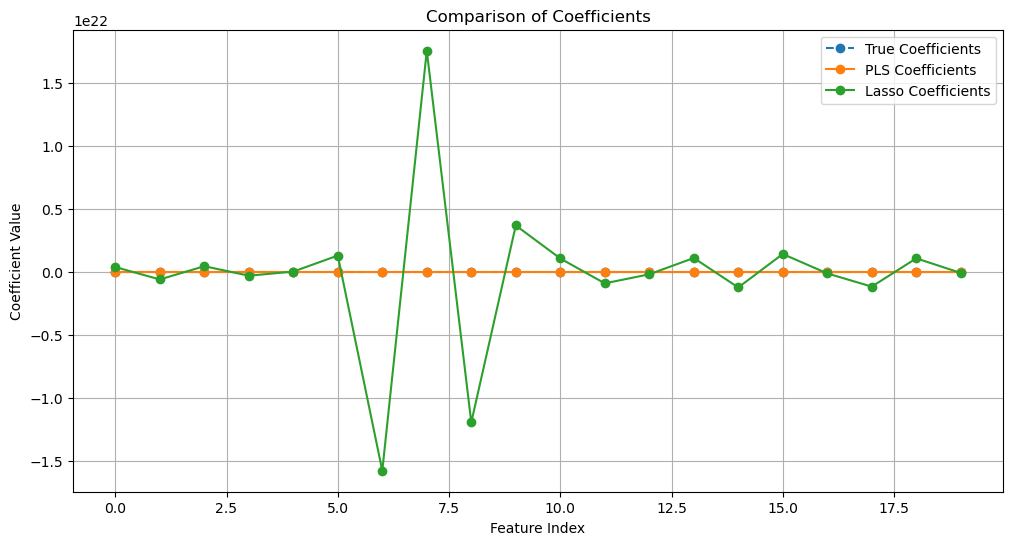

In [5]:
import random
import matplotlib.pyplot as plt

# Partial Least Squares Implementation
class PartialLeastSquares:
    def fit(self, X, y, max_components):
        n_samples, n_features = len(X), len(X[0])
        self.beta = [0] * n_features  # Coefficients

        for m in range(max_components):
            # Calculate phi_m for each feature
            phi_m = [sum(X[i][j] * y[i] for i in range(n_samples)) for j in range(n_features)]
            # Find the feature with the maximum correlation
            max_index = phi_m.index(max(phi_m))

            # Construct the z_m direction
            z_m = [X[i][max_index] for i in range(n_samples)]

            # Calculate the coefficient
            theta_m = sum(z_m[i] * y[i] for i in range(n_samples)) / sum(z_m[i] ** 2 for i in range(n_samples))
            self.beta[max_index] += theta_m

            # Orthogonalize X
            for j in range(n_features):
                if j != max_index:
                    projection = sum(z_m[i] * X[i][j] for i in range(n_samples)) / sum(z_m[i] ** 2 for i in range(n_samples))
                    for i in range(n_samples):
                        X[i][j] -= projection * z_m[i]

        return self.beta

# Generate synthetic data
def generate_data(n_samples, n_features, noise=0.1):
    X = [[random.uniform(0, 1) for _ in range(n_features)] for _ in range(n_samples)]
    coef = [random.uniform(-1, 1) for _ in range(n_features)]
    y = [sum(X[i][j] * coef[j] for j in range(n_features)) + random.uniform(-noise, noise) for i in range(n_samples)]
    return X, y, coef

# Lasso Implementation (Simplified)
class Lasso:
    def fit(self, X, y, alpha):
        n_samples, n_features = len(X), len(X[0])
        self.beta = [0] * n_features

        for iteration in range(100):  # Number of iterations
            for j in range(n_features):
                # Compute the prediction excluding the j-th feature
                prediction = sum(X[i][k] * self.beta[k] for k in range(n_features) for i in range(n_samples))
                # Calculate residual
                residual = [y[i] - prediction for i in range(n_samples)]
                # Update the coefficient for the j-th feature
                self.beta[j] = (sum(X[i][j] * residual[i] for i in range(n_samples)) / n_samples)
                # Apply L1 regularization (soft thresholding)
                if self.beta[j] > alpha:
                    self.beta[j] -= alpha
                elif self.beta[j] < -alpha:
                    self.beta[j] += alpha
                else:
                    self.beta[j] = 0

        return self.beta

# Plotting Function
def plot_coefficients(true_coef, pls_coef, lasso_coef):
    n_features = len(true_coef)

    plt.figure(figsize=(12, 6))
    plt.plot(true_coef, marker='o', label='True Coefficients', linestyle='dashed')
    plt.plot(pls_coef, marker='o', label='PLS Coefficients')
    plt.plot(lasso_coef, marker='o', label='Lasso Coefficients')
    
    plt.title('Comparison of Coefficients')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')
    plt.legend()
    plt.grid()
    plt.show()

# Initialize parameters
n_samples = 100
n_features = 20
max_components = 2  # Number of PLS directions to compute
lasso_alpha = 0.1  # Lasso regularization parameter

# Generate data
X, y, true_coef = generate_data(n_samples, n_features)

# Fit the PLS model
pls_model = PartialLeastSquares()
pls_coef = pls_model.fit(X, y, max_components)

# Fit the Lasso model
lasso_model = Lasso()
lasso_coef = lasso_model.fit(X, y, lasso_alpha)

# Plot results
plot_coefficients(true_coef, pls_coef, lasso_coef)
